In [18]:
import rasterio
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
image_file = "data/20200814_105841_1053_3B_AnalyticMS.tif"
#20200814_105841_1053_3B_AnalyticMS
# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(image_file) as src:
    band_red = src.read(3)

with rasterio.open(image_file) as src:
    band_nir = src.read(4)

In [3]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI. This is the equation at the top of this guide expressed in code
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [4]:
ndvi.shape

(3957, 8183)

In [16]:
np.nanmin(ndvi), np.nanmax(ndvi)

(-0.7932651321398124, 0.7209793161671592)

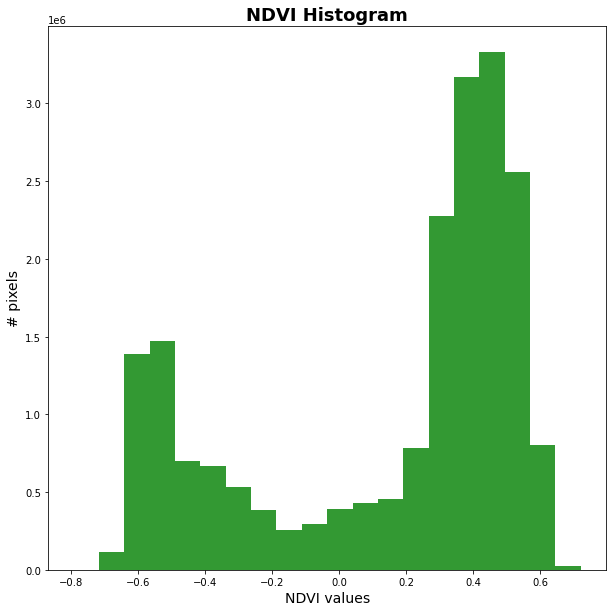

In [21]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("# pixels", fontsize=14)


x = ndvi[~np.isnan(ndvi)]
numBins = 20
ax.hist(x,numBins,color='green',alpha=0.8)

fig2.savefig("data/ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

In [5]:
import xarray as xr
ds = xr.open_rasterio(image_file) 
ds

<xarray.DataArray (band: 4, y: 3957, x: 8183)>
[129520524 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 9.167e+06 9.167e+06 9.167e+06 ... 9.155e+06 9.155e+06
  * x        (x) float64 2.8e+05 2.8e+05 2.8e+05 ... 3.045e+05 3.045e+05
Attributes:
    transform:         (3.0, 0.0, 279999.0, 0.0, -3.0, 9166596.0)
    crs:               +init=epsg:32725
    res:               (3.0, 3.0)
    is_tiled:          1
    nodatavals:        (0.0, 0.0, 0.0, 0.0)
    scales:            (1.0, 1.0, 1.0, 1.0)
    offsets:           (0.0, 0.0, 0.0, 0.0)
    descriptions:      ('blue', 'green', 'red', 'nir')
    AREA_OR_POINT:     Area
    TIFFTAG_DATETIME:  2020:08:14 10:58:41